In [3]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import all the necessary libraries

numpy: To work with arrays

pandas: To work with csv files and dataframes

matplotlib: To create charts using pyplot

warnings: To ignore all warnings which might be showing up in the notebook due to past/future depreciation of a feature

train_test_split: To split the dataset into training and testing data

StandardScaler: To scale all the features, so that the Machine Learning model better adapts to the dataset.

Importing the dataset

In [4]:
dataset = pd.read_csv("./Heart_dataset.csv")

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# printing the count of target column
dataset.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Print number of unique values per column

In [8]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Number of null values in each columns 

In [9]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the above results it is seen that there are no null values present

Description of dataset

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


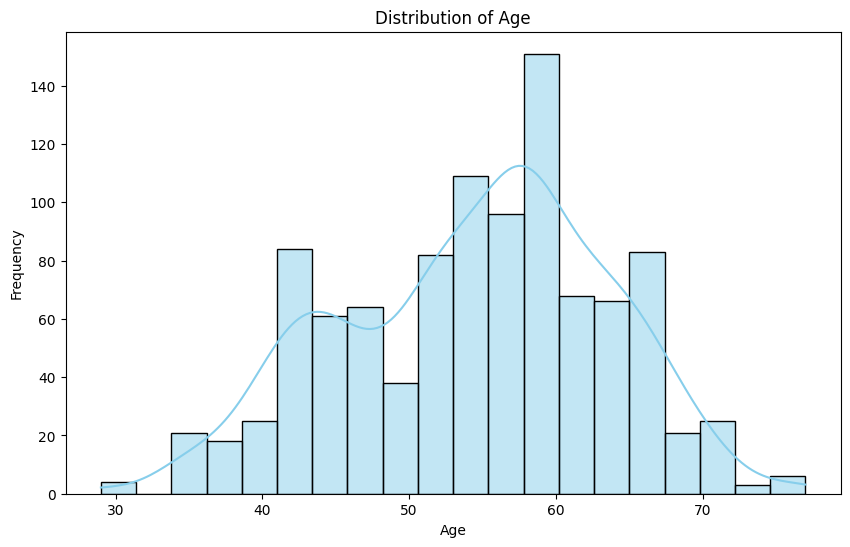

In [11]:
import seaborn as sns

# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(dataset["age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/zr/2wb4s69j7kl53vcr3tq54zpw0000gn/T/ipykernel_1797/3385101124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=dataset, palette="pastel")


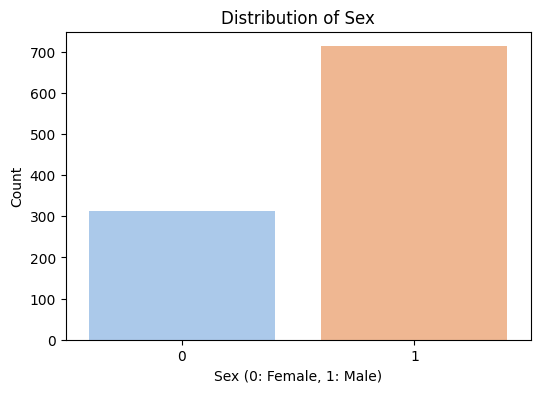

In [12]:
# Visualize the distribution of sex (assuming 0 for female, 1 for male)
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=dataset, palette="pastel")
plt.title("Distribution of Sex")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()

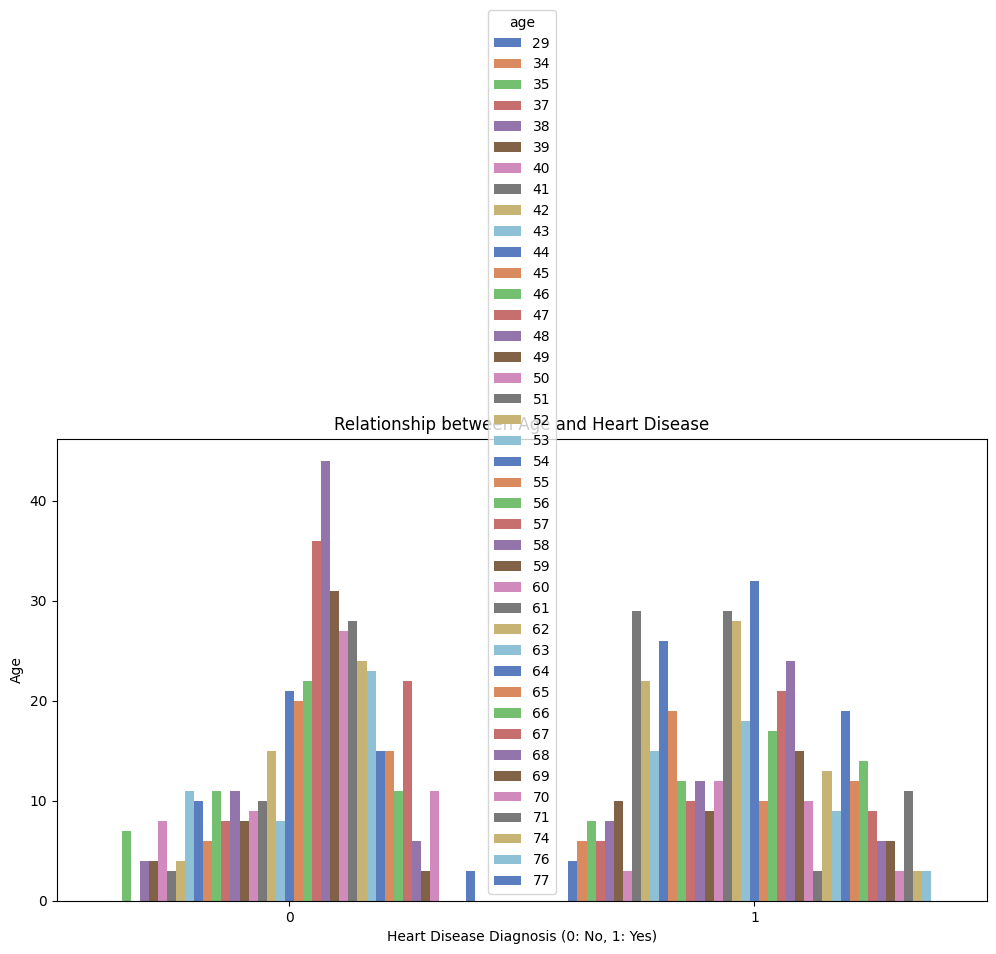

In [16]:
# Explore the relationship between age and the target variable
plt.figure(figsize=(12, 6))
sns.countplot(x="target", hue="age", data=dataset, palette="muted")
plt.title("Relationship between Age and Heart Disease")
plt.xlabel("Heart Disease Diagnosis (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

/var/folders/zr/2wb4s69j7kl53vcr3tq54zpw0000gn/T/ipykernel_1797/1020762251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="age", data=dataset, palette="viridis")


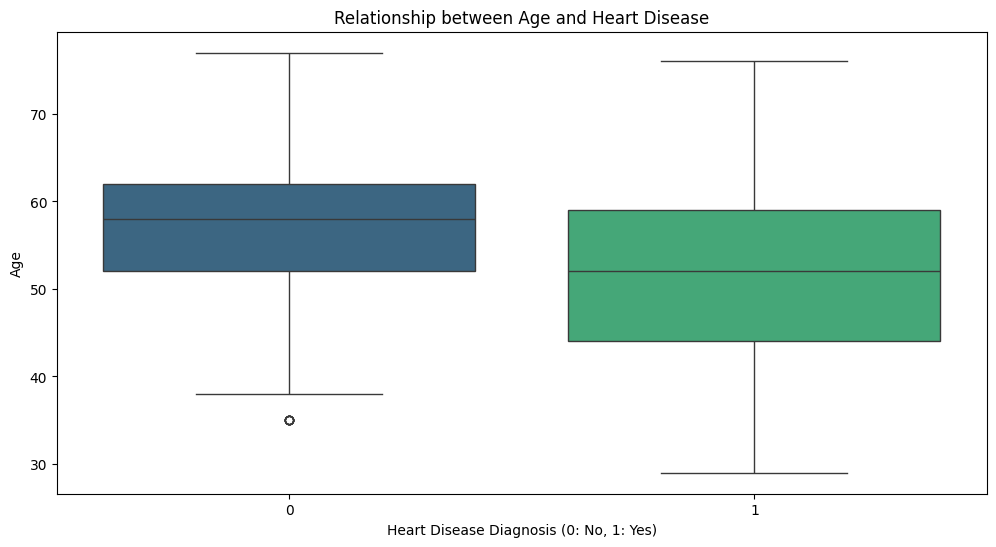

In [18]:
# Explore the relationship between age and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="age", data=dataset, palette="viridis")
plt.title("Relationship between Age and Heart Disease")
plt.xlabel("Heart Disease Diagnosis (0: No, 1: Yes)")
plt.ylabel("Age")
plt.show()

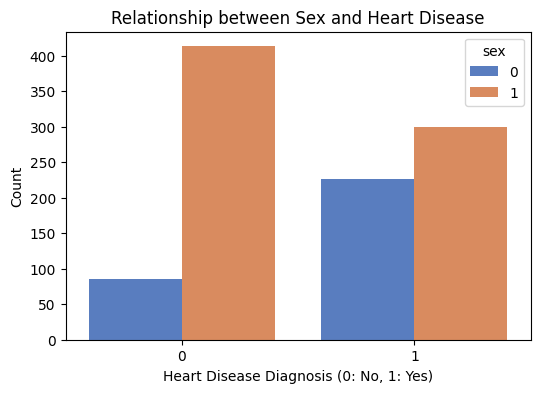

In [14]:
# Explore the relationship between sex and the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="target", hue="sex", data=dataset, palette="muted")
plt.title("Relationship between Sex and Heart Disease")
plt.xlabel("Heart Disease Diagnosis (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

In [19]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Display summary statistics of numerical features
print(dataset[numerical_features].describe())

               age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [21]:
print(dataset[numerical_features].describe())

                age      trestbps          chol       thalach       oldpeak
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03
mean  -3.431402e-16 -7.036106e-16 -3.466062e-18 -4.332578e-16 -2.426243e-16
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00
min   -2.804866e+00 -2.148237e+00 -2.327054e+00 -3.397080e+00 -9.123291e-01
25%   -7.095548e-01 -6.632165e-01 -6.787242e-01 -7.442713e-01 -9.123291e-01
50%    1.726817e-01 -9.205458e-02 -1.163527e-01  1.255019e-01 -2.311765e-01
75%    7.240794e-01  4.791073e-01  5.623715e-01  7.343432e-01  6.202642e-01
max    2.488552e+00  3.906079e+00  6.166694e+00  2.299935e+00  4.366603e+00


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

In [23]:
X = dataset.drop("target", axis=1)
y = dataset["target"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

In [26]:
voting_classifier = VotingClassifier(
    estimators=[
        ("decision_tree", decision_tree_model),
        ("random_forest", random_forest_model),
        ("gradient_boosting", gradient_boosting_model),
    ],
    voting="hard",
)

In [27]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42))])

In [28]:
y_pred = voting_classifier.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [32]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with your actual DataFrame name

# Assume 'sex' is the sensitive attribute, and 'target' is the target variable
sensitive_attribute = "sex"
target_variable = "target"

# Create a BinaryLabelDataset from your DataFrame
dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=dataset,
    label_names=[target_variable],
    protected_attribute_names=[sensitive_attribute],
)

# Use BinaryLabelDatasetMetric to calculate various metrics
metric_orig = BinaryLabelDatasetMetric(
    dataset,
    unprivileged_groups=[{sensitive_attribute: 0}],
    privileged_groups=[{sensitive_attribute: 1}],
)

# Display the fairness metrics
print("Original dataset metrics:")
print(f"Disparate Impact: {metric_orig.disparate_impact()}")
print(f"Mean Difference: {metric_orig.mean_difference()}")

Original dataset metrics:
Disparate Impact: 1.721559829059829
Mean Difference: 0.3036016111051174


In [33]:
# Use Reweighing to mitigate bias
reweighing = Reweighing(
    unprivileged_groups=[{sensitive_attribute: 0}],
    privileged_groups=[{sensitive_attribute: 1}],
)
dataset_transformed = reweighing.fit_transform(dataset)

# Recalculate metrics after reweighing
metric_transformed = BinaryLabelDatasetMetric(
    dataset_transformed,
    unprivileged_groups=[{sensitive_attribute: 0}],
    privileged_groups=[{sensitive_attribute: 1}],
)

# Display the fairness metrics after reweighing
print("\nTransformed dataset metrics:")
print(f"Disparate Impact: {metric_transformed.disparate_impact()}")
print(f"Mean Difference: {metric_transformed.mean_difference()}")


Transformed dataset metrics:
Disparate Impact: 1.0
Mean Difference: 0.0
